<a href="https://colab.research.google.com/github/Shahmeer-Ahmed/Crop_Recommendation_System_DS_FA24/blob/main/DS_Project_Fall2024_CropRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Crop Recommendation System**
**Description:**


---


This project aims to analyze the obtained dataset which contains the properties of soil and weather conditions in
order to recommend the best crop for farmers to grow, so that they can get bountiful harvest and avoid loss of crops due to growing unsuitable crops. This will also determine what kind of soil is needed to grow which crop, which can be an indicator of what fertilizers and others product the farmers may need to use if they wanted to grow any specific crop.

**Business Quesitons:**


1.   Can we predict recommended crops based on only soil properties?
2.   Can we predict recommended crops based on only weather conditions?
3.   Do regions with more rainfall have more available options for crops as compared to dry regions?
4.   Are humidity, rainfall and temperature better predictor of crop options as compared to soil properties?
5.   What are the crops that are more versatile (easy to grow) as compared to others?
6.   What is the relationship between rainfall levels and the required nutrient composition (NPK) for optimal crop growth?
7.   Which feature in the dataset has the most influence on crop recommendation?



## **Dataset:**
The datasets being used in our project are from the following two sources:


1.   
https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset
2.   https://data.mendeley.com/datasets/8v757rr4st/1

Both of these datasets are not in the same format (i.e Number of Columns, Column Names etc) and as such transformation of dataset is required in order to incorporate both of them for the use of the project.


**Dataset # 1(Kaggle Dataset):**

The first dataset we obtained from kaggle had the following columns:


*   N: Nitrogen content in soil.
*   P: Phosphorus content in soil.
*   K: Potassium content in soil.
*   temperature: Average temperature.
*   humidity: Average humidity.
*   ph: Soil pH value
*   rainfall: Rainfall amount.
*   label: Target crop type.



In [65]:
##Importing Libraries to be used in the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [66]:
df1 = pd.read_csv("Crop_recommendation.csv")
display(df1.head())
display(df1.dtypes)
display(df1.shape)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


,0
N,int64
P,int64
K,int64
temperature,float64
humidity,float64
ph,float64
rainfall,float64
label,object


(2200, 8)

**Dataset # 2(Mendeley Dataset):**

The second dataset we obtained from mendeley has the following columns:

*   **Soilcolor**: Describes the color of the soil (e.g., "Yellowish brown", "red").
*   **Ph**: Soil pH value, indicating soil acidity or alkalinity.
*   **K**: Potassium content in the soil.
*   **P**: Phosphorus content in the soil.
*   **N**: Nitrogen content in the soil.
*   **Zn**: Zinc content in the soil (a micronutrient).
*   **S**: Sulfur content in the soil (a secondary nutrient).
*   **QV2M-W, QV2M-Sp, QV2M-Su, QV2M-Au**: Specific humidity at 2 meters for Winter, Spring, Summer, and Autumn, respectively.
*   **T2M_MAX-W, T2M_MAX-Sp, T2M_MAX-Su, T2M_MAX-Au**: Maximum temperature at 2 meters for each season.
*   **T2M_MIN-W, T2M_MIN-Sp, T2M_MIN-Su, T2M_MIN-Au**: Minimum temperature at 2 meters for each season.
*   **PRECTOTCORR-W, PRECTOTCORR-Sp, PRECTOTCORR-Su, PRECTOTCORR-Au**: Corrected total precipitation(rainfall) for each season.
*   **WD10M**: Wind direction at 10 meters.
*   **GWETTOP**: Surface soil moisture.
*   **CLOUD_AMT**: Cloud cover amount.
*   **WS2M_RANGE**: Wind speed range at 2 meters.

This dataset contained comprehensive data obtained from NASA's cloud infrastructure. But in order to use it in our project, We will need to transform this data to match with the data set obtained from Kaggle.


In [67]:
df2 = pd.read_csv("Crop_Recommendation_using_Soil_Properties_and_Weather_Prediction.csv")
display(df2.head())
display(df2.dtypes)
display(df2.shape)

,Soilcolor,Ph,K,P,N,Zn,S,QV2M-W,QV2M-Sp,QV2M-Su,...,PRECTOTCORR-W,PRECTOTCORR-Sp,PRECTOTCORR-Su,PRECTOTCORR-Au,WD10M,GWETTOP,CLOUD_AMT,WS2M_RANGE,PS,label
0,Yellowish brown,5.81,738.231,5.401,0.23,2.976000,13.816,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
1,Yellowish brown,5.43,606.382,10.478,0.23,3.077000,16.421,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
2,brown,5.41,386.580,6.847,0.23,6.611000,16.557,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
3,red,5.65,207.086,3.418,0.23,0.460181,16.075,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
4,red,5.27,317.357,39.282,0.23,2.743000,12.558,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley


,0
Soilcolor,object
Ph,float64
K,float64
P,float64
N,float64
Zn,float64
S,float64
QV2M-W,float64
QV2M-Sp,float64
QV2M-Su,float64


(3867, 29)

## **Data Transformation:**
In order to combine both datasets, we will first need to transform both of the datasets into the same amount of features and datatypes which is being done in the following steps:


1.   Drop extra columns that are not common in both datasets
2.   Take average temperature from all the seasonal temperature values in data set # 2 and save as **temperature**
3.   Take average humidity from all seasonal temperature values in dataset # 2 and save as **humidity**
4.   Take average precipitation from all seasonal precipitation values in dataset # 2 and save as **rainfall**
5.   Renamed soil properties with their full names

After the dataframe has been transformed, both dataframes will be merged in order to get a singular dataframe that will then be used throughout the project.



In [68]:
temperature_columns = [
    'T2M_MAX-W', 'T2M_MAX-Sp', 'T2M_MAX-Su', 'T2M_MAX-Au',
    'T2M_MIN-W', 'T2M_MIN-Sp', 'T2M_MIN-Su', 'T2M_MIN-Au'
]
humidity_columns = ['QV2M-W', 'QV2M-Sp', 'QV2M-Su', 'QV2M-Au']
precipitation_columns = ['PRECTOTCORR-W', 'PRECTOTCORR-Sp', 'PRECTOTCORR-Su', 'PRECTOTCORR-Au']

transformed_df = pd.DataFrame({
    'N': df2['N'],
    'P': df2['P'],
    'K': df2['K'],
    'ph': df2['Ph'],
    'temperature': df2[temperature_columns].mean(axis=1),
    'humidity': df2[humidity_columns].mean(axis=1),
    'rainfall': df2[precipitation_columns].mean(axis=1),
    'label': df2['label']
})

display(transformed_df.head())
display(transformed_df.dtypes)
display(transformed_df.shape)

,N,P,K,ph,temperature,humidity,rainfall,label
0,0.23,5.401,738.231,5.81,16.512917,10.024167,6.229167,Barley
1,0.23,10.478,606.382,5.43,16.512917,10.024167,6.229167,Barley
2,0.23,6.847,386.580,5.41,16.512917,10.024167,6.229167,Barley
3,0.23,3.418,207.086,5.65,16.512917,10.024167,6.229167,Barley
4,0.23,39.282,317.357,5.27,16.512917,10.024167,6.229167,Barley


,0
N,float64
P,float64
K,float64
ph,float64
temperature,float64
humidity,float64
rainfall,float64
label,object


(3867, 8)

In [69]:
# Merge the two datasets by concatenating along the rows
df = pd.concat([df1, transformed_df], ignore_index=True)
df = df.rename(columns={"N":"Nitrogen","P":"Phosphorus","K":"Potassium"})
df.head()
display(df.head())
display(df.dtypes)
display(df.shape)

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice


,0
Nitrogen,float64
Phosphorus,float64
Potassium,float64
temperature,float64
humidity,float64
ph,float64
rainfall,float64
label,object


(6067, 8)

## **Data Cleanup**
In order to refine the dataset, We will perform cleanup operations such as removing any duplicated rows and any null values that exist within the dataset

In [70]:
##Checking and removing duplicate rows
duplicate_rows_df =df[df.duplicated()]
print("Number of duplicates records are\n",duplicate_rows_df.shape)
df.drop_duplicates(inplace=True)
display(df.head())
display(df.shape)

Number of duplicates records are
 (1, 8)


,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice


(6066, 8)

In [71]:
##Checking for Null Values
print(df.isnull().sum())
df = df.dropna()
display(df.count())
print(df.isnull().sum())

Nitrogen       0
Phosphorus     0
Potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


,0
Nitrogen,6066
Phosphorus,6066
Potassium,6066
temperature,6066
humidity,6066
ph,6066
rainfall,6066
label,6066


Nitrogen       0
Phosphorus     0
Potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


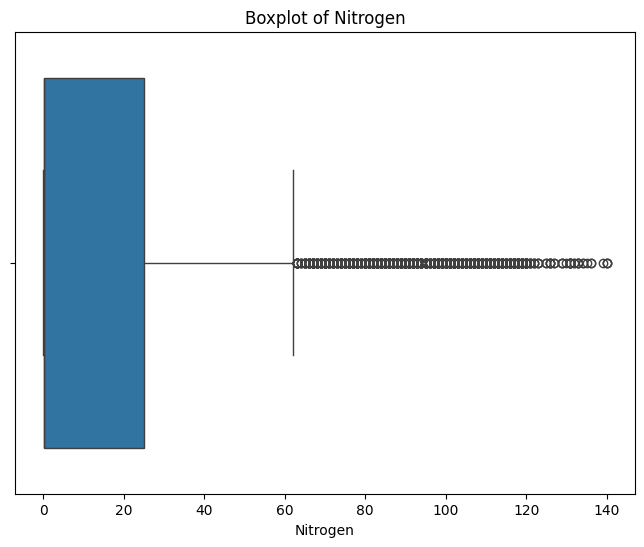

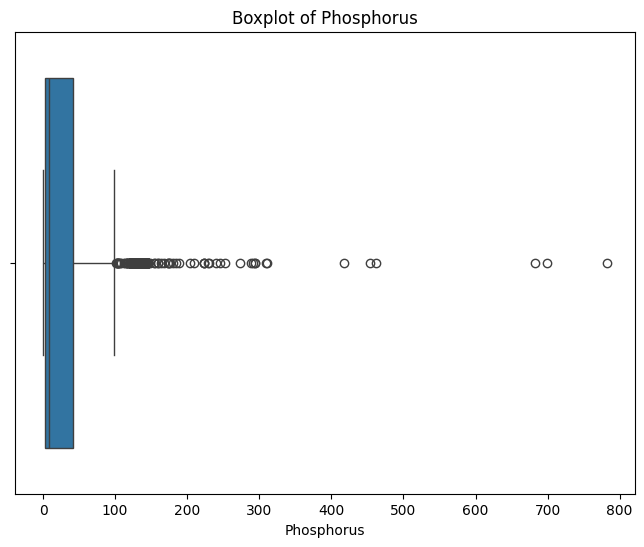

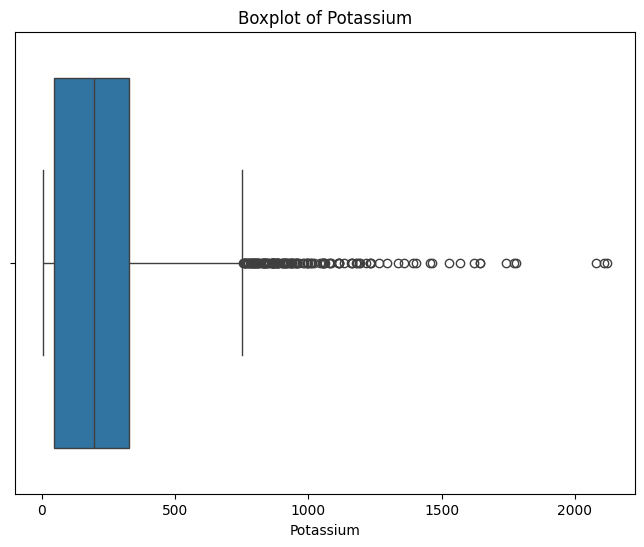

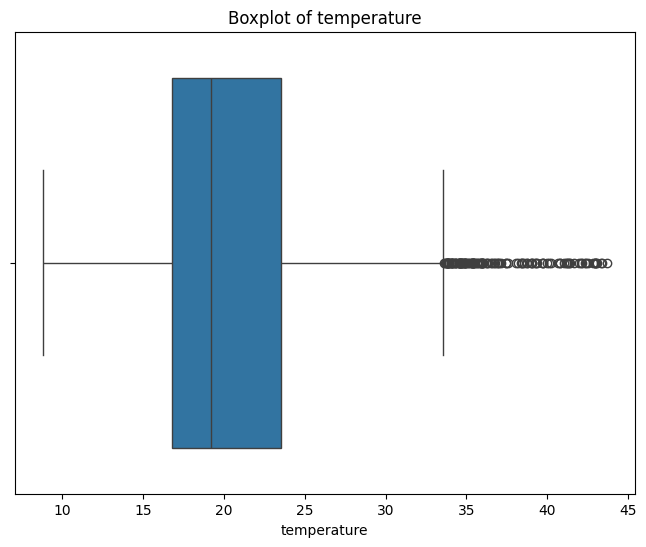

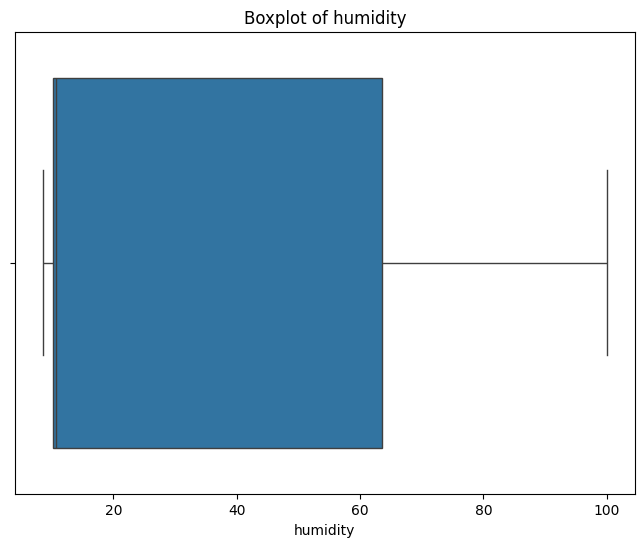

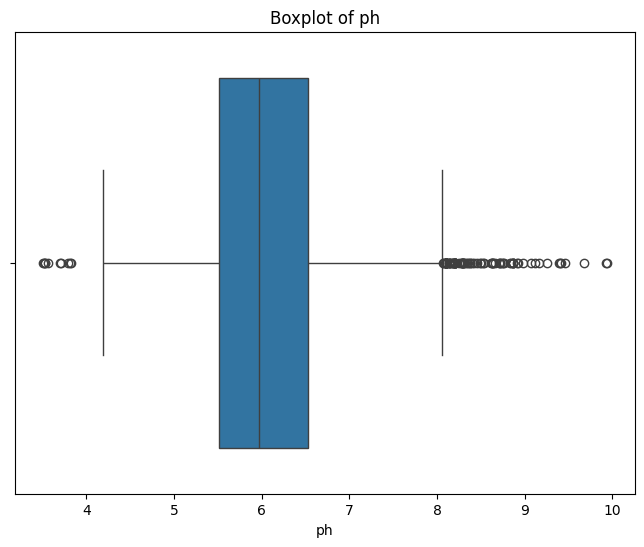

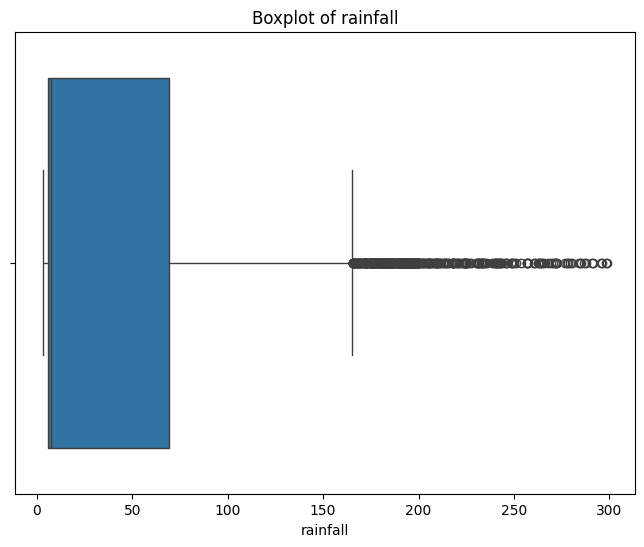

In [72]:
##Detecting and removing outliers
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()  # Get numerical columns

# Display boxplots before checking for outliers
for column in numerical_columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [73]:
# Extract the numerical columns (excluding the label/output column)
numerical_df = df[numerical_columns]

# Calculate the IQR (Interquartile Range)
Q1 = numerical_df.quantile(0.25)  # First quartile
Q3 = numerical_df.quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile Range
print(IQR)
# Define the upper and lower bounds for outlier detection
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify rows with outliers
outlier_condition = (numerical_df < lower_bound) | (numerical_df > upper_bound)
outlier_rows_index = outlier_condition.any(axis=1)  # Identify rows with any outlier

# Remove rows with outliers
df = df[~outlier_rows_index]

# Display the shape of the cleaned dataset
print("Shape of the dataset after removing outliers:", df.shape)

Nitrogen        24.840000
Phosphorus      39.000000
Potassium      282.000000
temperature      6.719011
humidity        53.324983
ph               1.020000
rainfall        63.739586
dtype: float64
Shape of the dataset after removing outliers: (4599, 8)


## **Data Visualization**

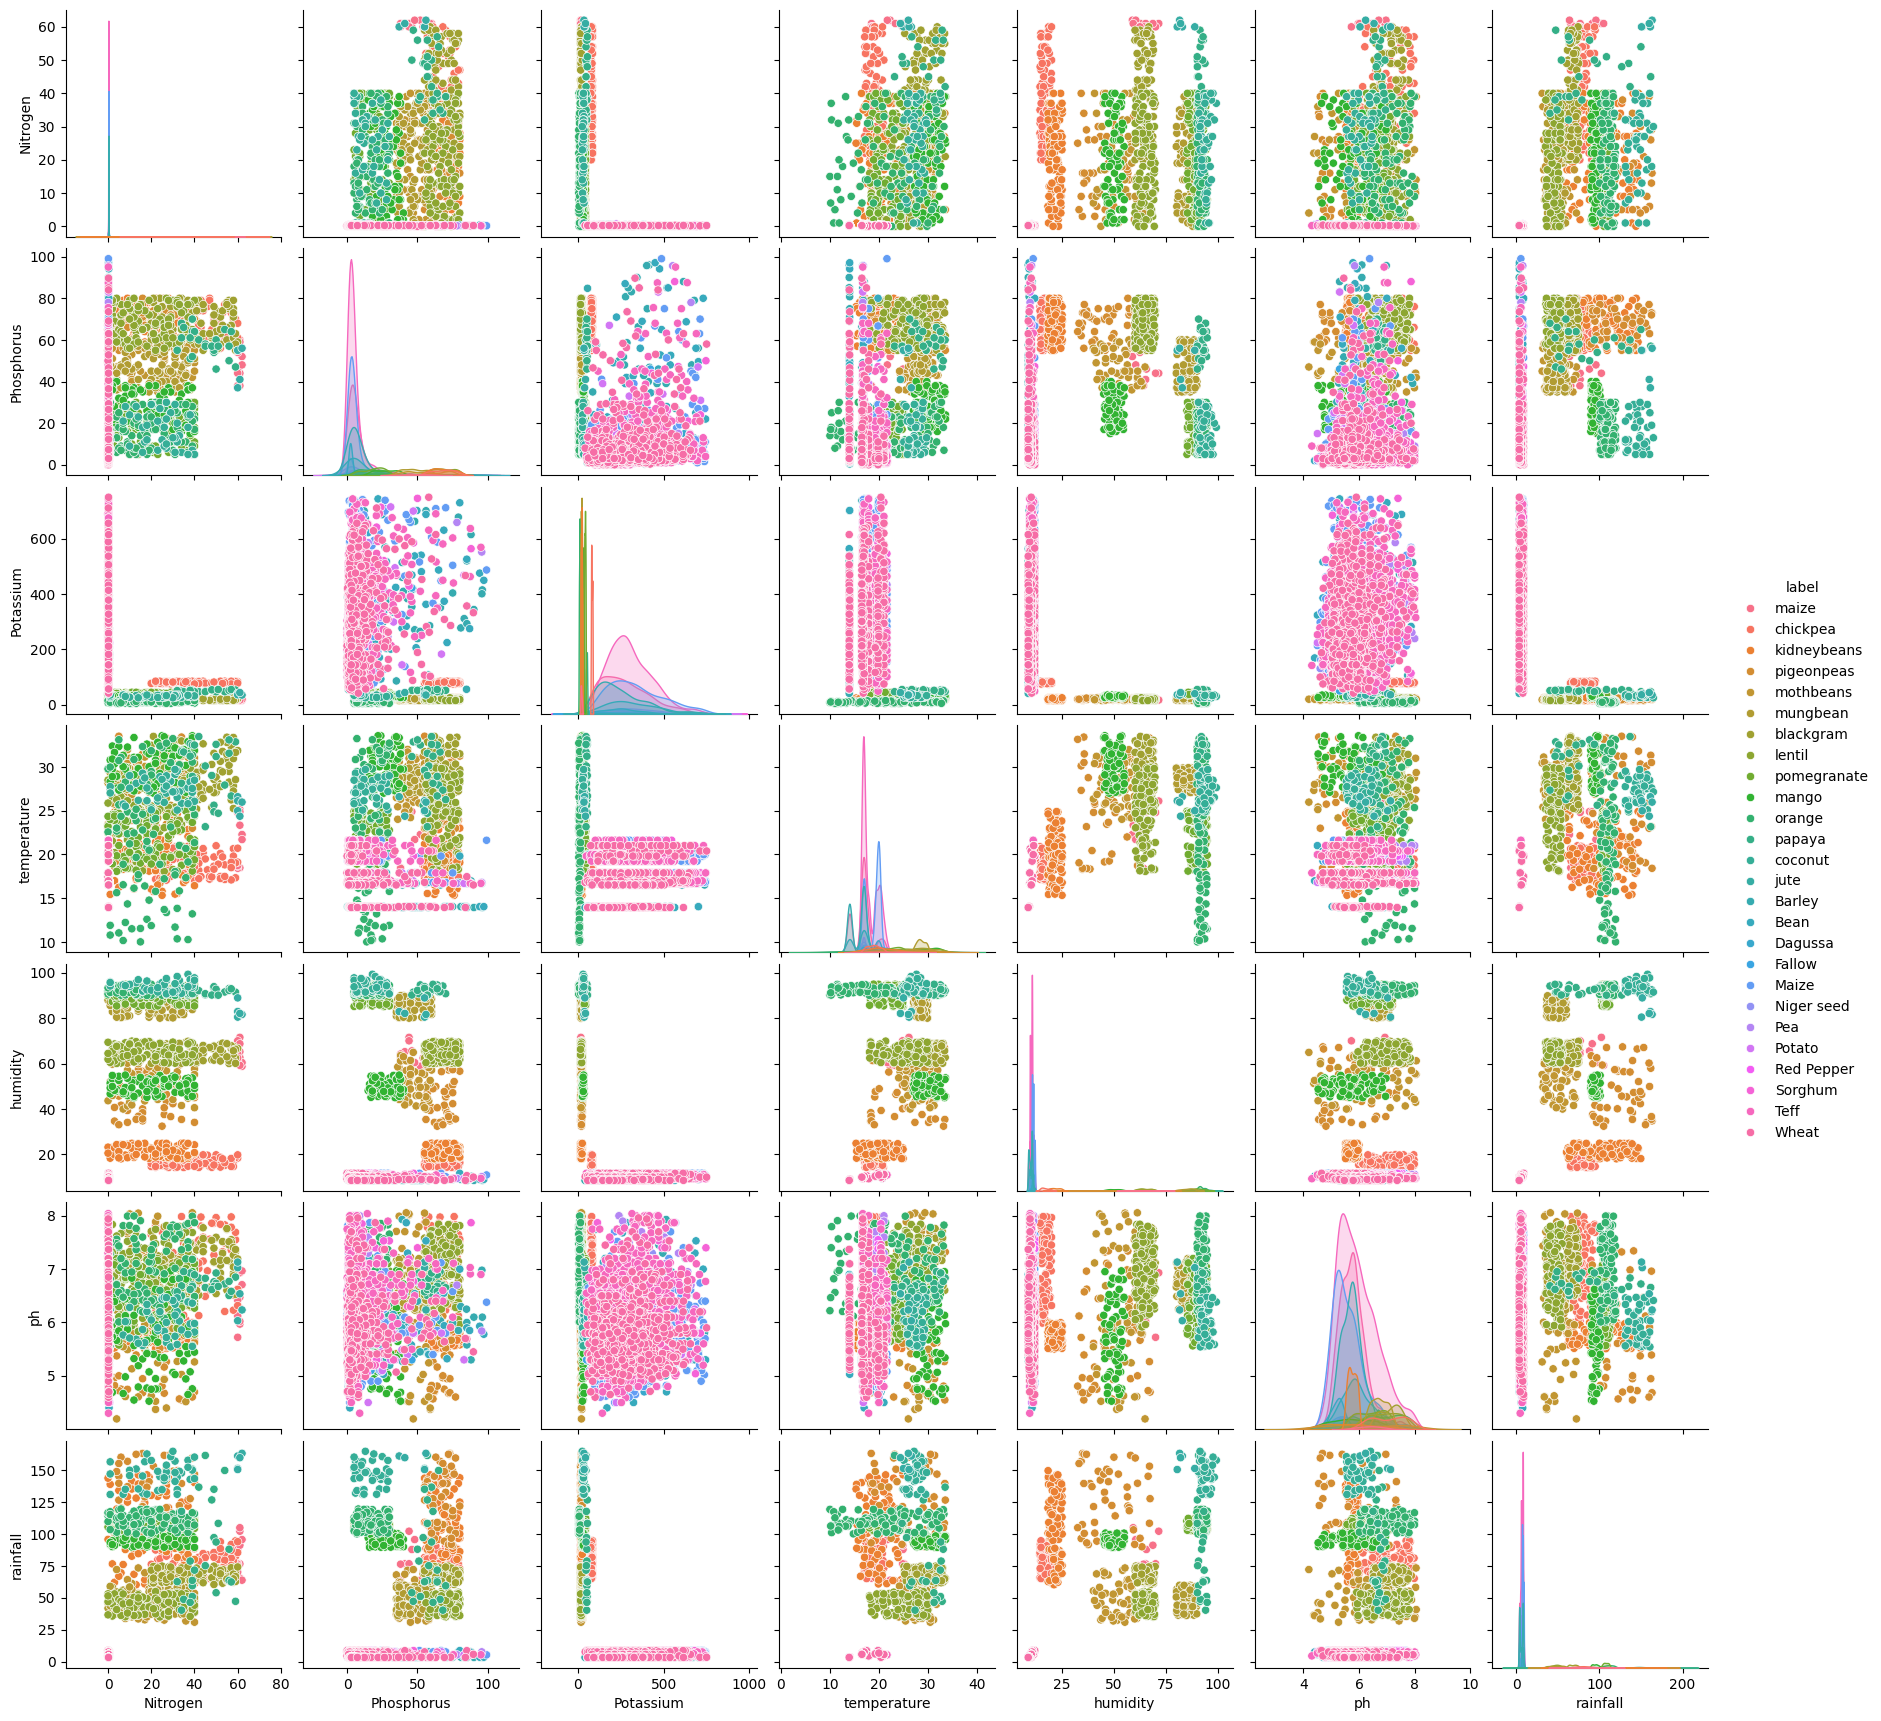

In [74]:
sns.pairplot(df, hue='label', diag_kind='kde')
plt.show()


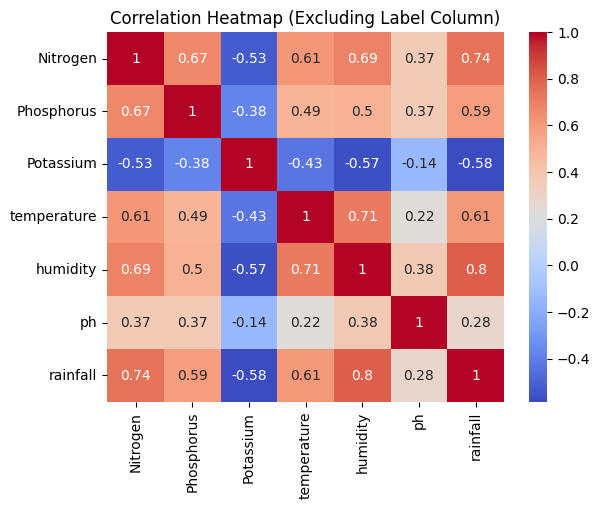

In [75]:
# Compute the correlation matrix excluding the 'label' column
corr_matrix = df.drop(columns=['label']).corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Excluding Label Column)")
plt.show()

## **Modelling and Insights**

### **Train and Test Model using cleaned dataset**


Accuracy: 0.6043478260869565
Precision: 0.575841126030938
Recall: 0.6043478260869565
F1-score: 0.5841053837542706


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


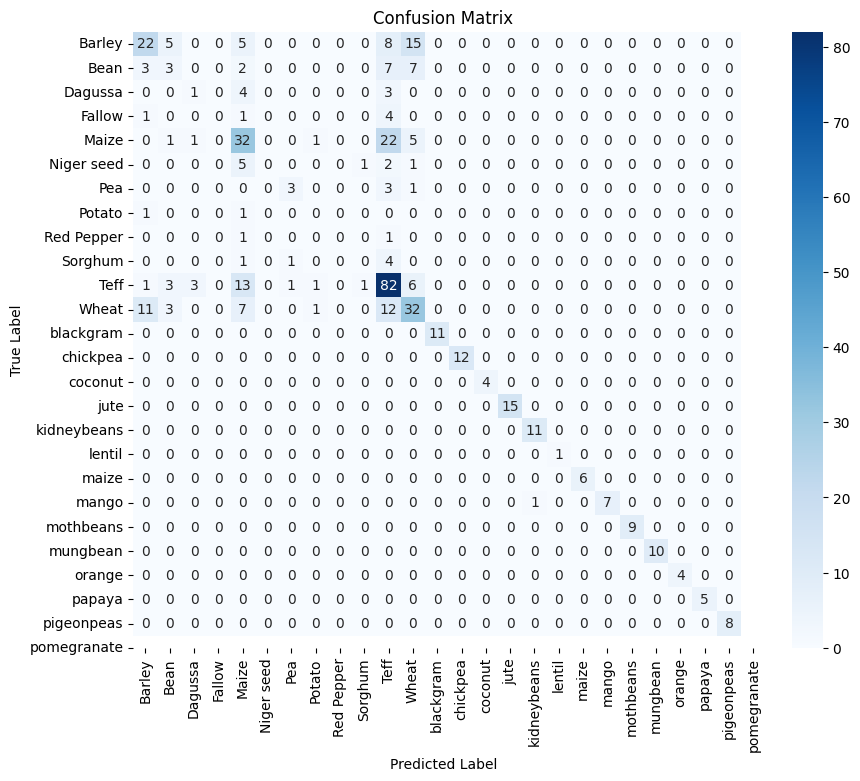

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Features and target
X = df.drop(columns=['label'])
y = df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### **Can we predict recommended crops based on only soil properties?**

After modelling using only the soil properties(N,P,K,ph) we found that the performance scores for the model was very low indicating that prediction using only soil properties did not give a very good result




Accuracy: 0.5119565217391304
Precision: 0.49324029193260843
Recall: 0.5119565217391304
F1-score: 0.48784487022965306


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


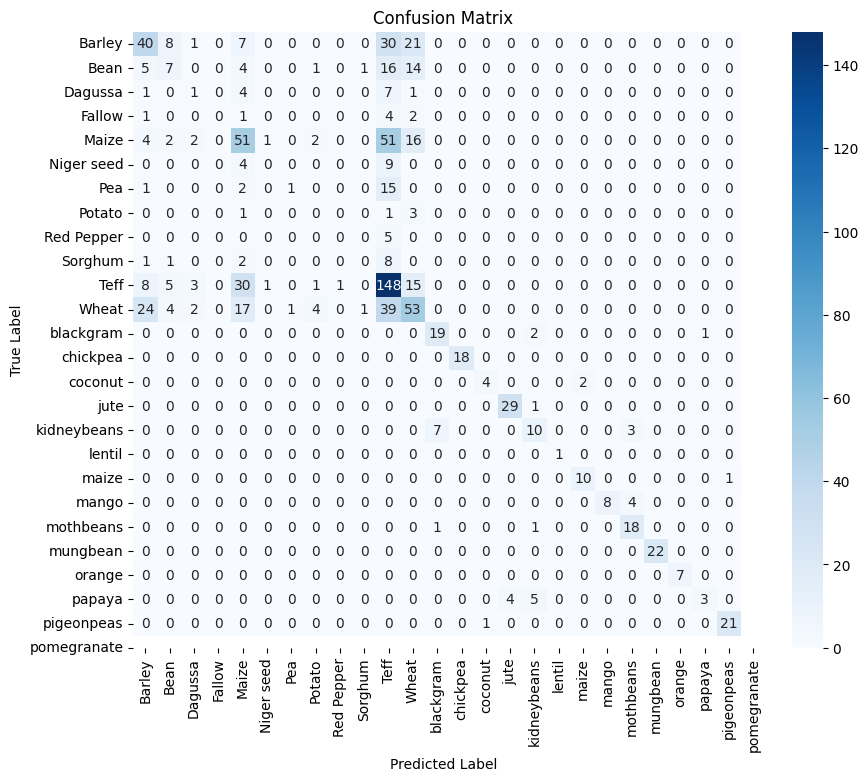

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Features and target
X = df[['Nitrogen', 'Phosphorus', 'Potassium', 'ph']]
y = df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### **Can we predict recommended crops based on only weather conditions?**

After modelling using only the weather conditions (temperature, humidity, rainfall) we found that the performance scores for the model was low indicating that prediction using only weather conditions did not give a very good result

Accuracy: 0.5445652173913044
Precision: 0.5633772401373007
Recall: 0.5445652173913044
F1-score: 0.4934285543517516


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


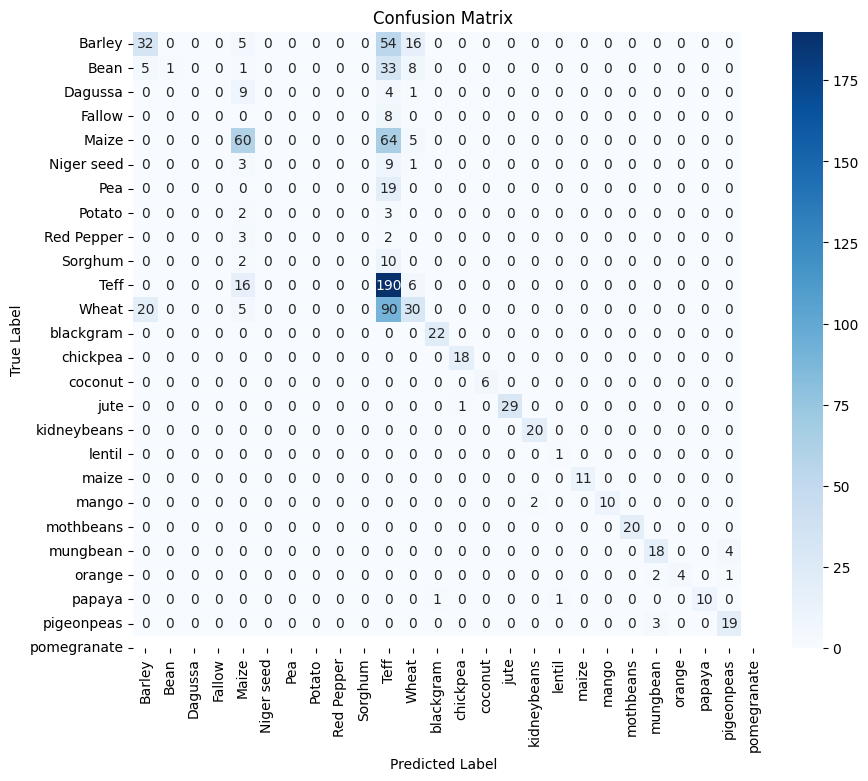

In [78]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Features and target
X = df[['temperature', 'humidity', 'rainfall']]
y = df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### **Do regions with more rainfall have more available options for crops as compared to dry regions?**
Based on the dataset, We've found that the number of crops that can be grown in regions with a higher amount of rainfall are much higher than crops that can be grown in dry regions.

Regions with rainfall above 6.978749999500001: 26 crop options
Regions with rainfall below 6.978749999500001: 12 crop options


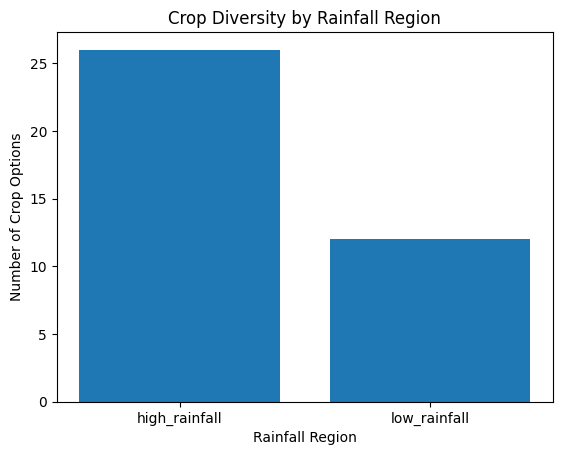

In [79]:
# Calculate quantiles of rainfall to divide regions
low_quantile = df['rainfall'].quantile(0.25)  # 25th percentile
high_quantile = df['rainfall'].quantile(0.75)  # 75th percentile

# Determine the threshold as the midpoint between quantiles
rainfall_threshold = (low_quantile + high_quantile) / 2

# Split the data into two groups based on rainfall
high_rainfall_regions = df[df['rainfall'] >= rainfall_threshold]
low_rainfall_regions = df[df['rainfall'] < rainfall_threshold]

# Calculate the number of unique crops in each region
high_rainfall_crop_diversity = len(high_rainfall_regions['label'].unique())
low_rainfall_crop_diversity = len(low_rainfall_regions['label'].unique())

# Compare and print the results
print(f"Regions with rainfall above {rainfall_threshold}: {high_rainfall_crop_diversity} crop options")
print(f"Regions with rainfall below {rainfall_threshold}: {low_rainfall_crop_diversity} crop options")

# Store the results in a dictionary (optional)
diversity_results = {
    "high_rainfall": high_rainfall_crop_diversity,
    "low_rainfall": low_rainfall_crop_diversity
}

# Extract data for the chart
regions = list(diversity_results.keys())
crop_diversity = list(diversity_results.values())

# Create the bar chart
plt.bar(regions, crop_diversity)

# Add labels and title
plt.xlabel("Rainfall Region")
plt.ylabel("Number of Crop Options")
plt.title("Crop Diversity by Rainfall Region")

# Display the chart
plt.show()

### **Are humidity, rainfall and temperature better predictor of crop options as compared to soil properties?**

After modelling the dataset once, by using only soil properties, and once, by using only weather conditions, We've found that weather conditions give an overall more accurate result in comparison to soil properties. But overall, Both of the accuracy results are low which indicates that both should be used together for better results.

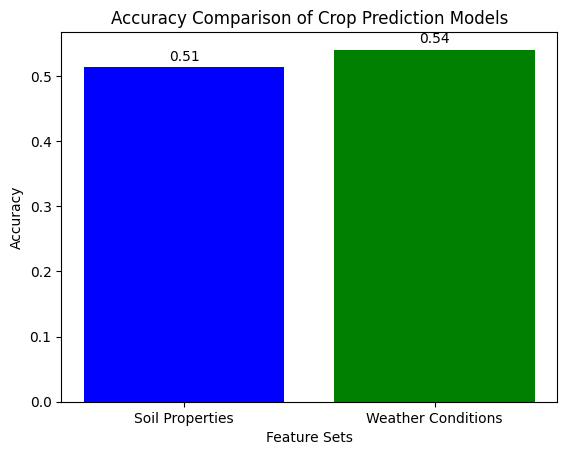

In [80]:
# Features and target
X_soil = df[['Nitrogen', 'Phosphorus', 'Potassium', 'ph']]
X_weather = df[['humidity', 'rainfall', 'temperature']]
y = df['label']

# Split data
X_soil_train, X_soil_test, y_train, y_test = train_test_split(X_soil, y, test_size=0.2, random_state=42)
X_weather_train, X_weather_test, _, _ = train_test_split(X_weather, y, test_size=0.2, random_state=42)

# Train models
model_soil = RandomForestClassifier()
model_soil.fit(X_soil_train, y_train)

model_weather = RandomForestClassifier()
model_weather.fit(X_weather_train, y_train)

# Predict and evaluate
y_pred_soil = model_soil.predict(X_soil_test)
y_pred_weather = model_weather.predict(X_weather_test)

accuracy_soil = accuracy_score(y_test, y_pred_soil)
accuracy_weather = accuracy_score(y_test, y_pred_weather)

# Create a bar chart
models = ['Soil Properties', 'Weather Conditions']
accuracies = [accuracy_soil, accuracy_weather]

plt.bar(models, accuracies, color=['blue', 'green'])

# Add labels and title
plt.xlabel("Feature Sets")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Crop Prediction Models")

# Display accuracy values on top of bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center')

# Show the chart
plt.show()

### **What are the crops that are more versatile (easy to grow) as compared to others?**


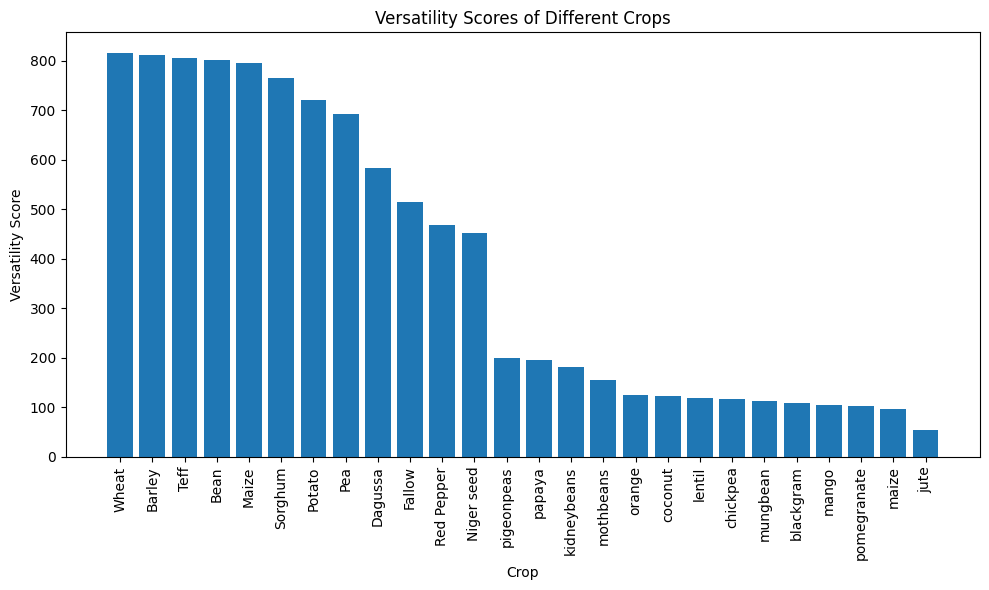

In [81]:
crop_ranges = {}
for crop in df['label'].unique():
    crop_data = df[df['label'] == crop]
    crop_ranges[crop] = {
        'Nitrogen': (crop_data['Nitrogen'].min(), crop_data['Nitrogen'].max()),
        'Phosphorus': (crop_data['Phosphorus'].min(), crop_data['Phosphorus'].max()),
        'Potassium': (crop_data['Potassium'].min(), crop_data['Potassium'].max()),
        'ph': (crop_data['ph'].min(), crop_data['ph'].max()),
        'temperature': (crop_data['temperature'].min(), crop_data['temperature'].max()),
        'humidity': (crop_data['humidity'].min(), crop_data['humidity'].max()),
        'rainfall': (crop_data['rainfall'].min(), crop_data['rainfall'].max())
    }

versatility_scores = {}
for crop, ranges in crop_ranges.items():
    versatility_score = 0
    for feature, (min_val, max_val) in ranges.items():
        versatility_score += (max_val - min_val)
    versatility_scores[crop] = versatility_score

# Sort crops by versatility score for better visualization
sorted_crops = sorted(versatility_scores.items(), key=lambda item: item[1], reverse=True)

# Extract crop names and scores for plotting
crop_names = [crop[0] for crop in sorted_crops]
versatility_values = [crop[1] for crop in sorted_crops]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(crop_names, versatility_values)
plt.xticks(rotation=90)
plt.xlabel("Crop")
plt.ylabel("Versatility Score")
plt.title("Versatility Scores of Different Crops")
plt.tight_layout()
plt.show()

### **What is the relationship between rainfall levels and the required nutrient composition (NPK) for optimal crop growth?**
As can be seen in the following chart, The potassium levels seem to go down with higher rainfall levels whereas the Nitrogen and Phosphorous requirements are increasing as rainfall increases. This displays that for areas with varying degrees of rainfall, It is important to choose the fertilizers that give the best composition of soil nutrients in order to achieve the most benefit

<ipython-input-82-a015a2544073>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  npk_by_rainfall = df.groupby('rainfall_group')[['Nitrogen', 'Phosphorus', 'Potassium']].mean()


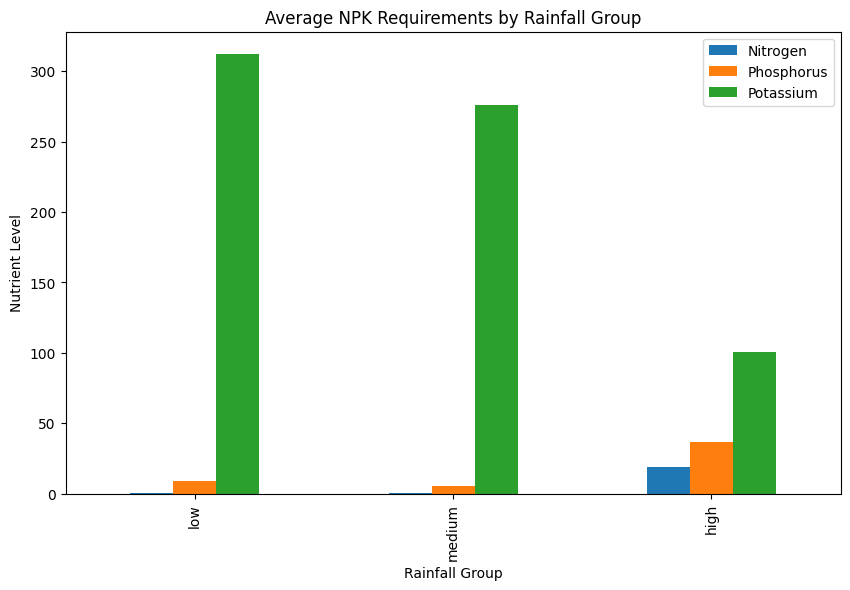

In [82]:
##Divide data into three groups based on rainfall quantiles
df['rainfall_group'] = pd.qcut(df['rainfall'], 3, labels=['low', 'medium', 'high'])
# Calculate average NPK values for each rainfall group
npk_by_rainfall = df.groupby('rainfall_group')[['Nitrogen', 'Phosphorus', 'Potassium']].mean()
npk_by_rainfall.plot(kind='bar', figsize=(10, 6))
plt.title('Average NPK Requirements by Rainfall Group')
plt.xlabel('Rainfall Group')
plt.ylabel('Nutrient Level')
plt.show()

### **Which feature in the dataset has the most influence on crop recommendation?**

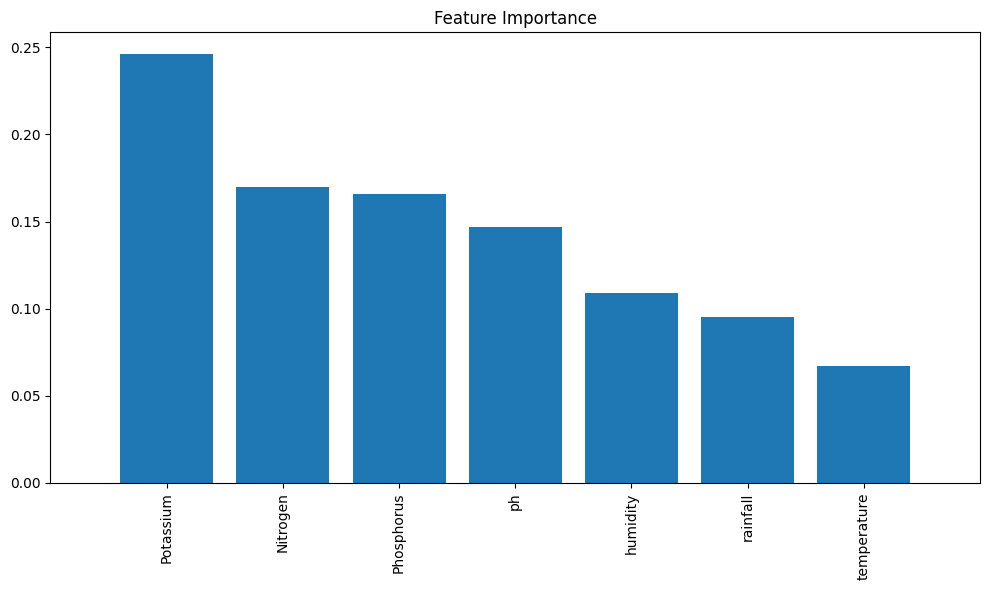

In [83]:
# Features and target
X = df[['Nitrogen', 'Phosphorus', 'Potassium', 'ph', 'temperature', 'humidity', 'rainfall']]
y = df['label']

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_

feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()